# Introduction:
Welcome to my data science protfolio project. For this project I will be analyzing the data on GDP and life expectancy from the World Health Organization and the World Bank and identifying the relationship between the GDP and life expectancy of six countries.

**Questions to answer**:
+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of life expectancy?
+ What is the distribution of GDP ?

The data for the GDP and Life expectancy has been provided by the [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) and [World Health Organization (WHO)](http://apps.who.int/gho/data/node.main.688) respectively


In [3]:
# Bismillah
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


Looks like it's quite a small dataset and doesn't have any missing values which saves us a lot

In [6]:
df.describe(include="all")

,Country,Year,Life expectancy at birth (years),GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


In [7]:
# Let's first rename a column for convenience
df = df.rename(columns={"Life expectancy at birth (years)":"Life_expectancy"})

* Just how distrubuted is our life expectancy variable?
* And just how distrubuted is our GDP variable?

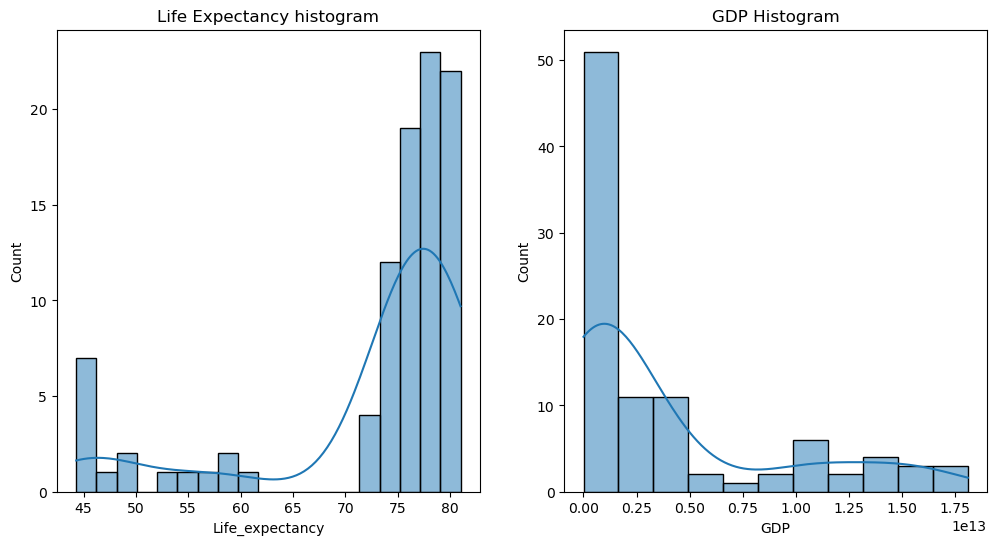

In [8]:
# Analysing the Life expectancy variable
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df.Life_expectancy, kde=True)
plt.title("Life Expectancy histogram")

plt.subplot(1, 2, 2)
sns.histplot(df.GDP, kde=True)
plt.title("GDP Histogram")

plt.show()

Our data seems skewed in an unusual way, we can see that from the histogram the tail extends to the left
meaning that it's negatively skewed or left skewed.
This may by due to the fact that life exepectancy is low in some countries (most likely low income countries). let's test our theory and see which countries have this low life expectancy

In [9]:
low_life_expectancy_countries = df[df.Life_expectancy <= 60]
low_life_expectancy_countries

,Country,Year,Life_expectancy,GDP
80,Zimbabwe,2000,46.0,6.689958e+09
81,Zimbabwe,2001,45.3,6.777385e+09
82,Zimbabwe,2002,44.8,6.342116e+09
83,Zimbabwe,2003,44.5,5.727592e+09
84,Zimbabwe,2004,44.3,5.805598e+09
85,Zimbabwe,2005,44.6,5.755215e+09
86,Zimbabwe,2006,45.4,5.443896e+09
87,Zimbabwe,2007,46.6,5.291950e+09
88,Zimbabwe,2008,48.2,4.415703e+09
89,Zimbabwe,2009,50.0,8.621574e+09


In [10]:
high_gdp_countries = df[df.GDP >= 1e13].Country
high_gdp_countries

30                       China
31                       China
64    United States of America
65    United States of America
66    United States of America
67    United States of America
68    United States of America
69    United States of America
70    United States of America
71    United States of America
72    United States of America
73    United States of America
74    United States of America
75    United States of America
76    United States of America
77    United States of America
78    United States of America
79    United States of America
Name: Country, dtype: object

Looks like we were right the skewness in the `Life_expectancy` is comming from "Zimbabwe" and the left skewness in the `GDP` is comming from the U.S and some from China

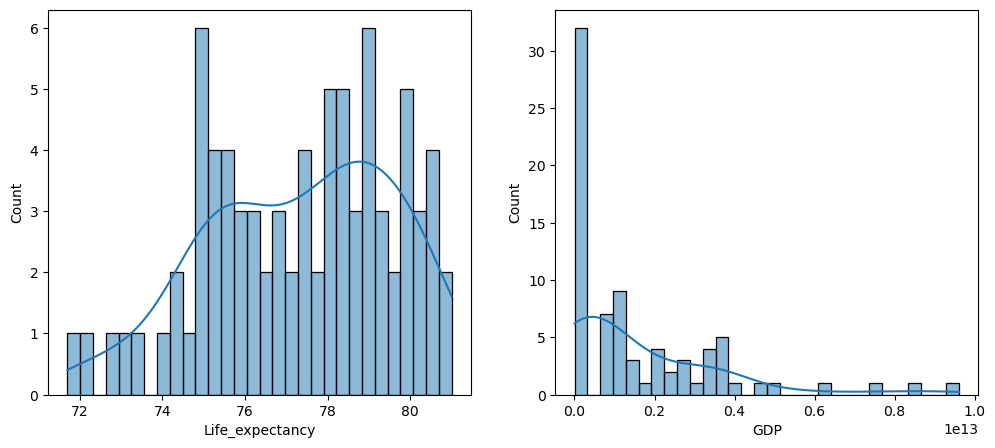

In [27]:
new_GDP_data = df[df.Country != "Zimbabwe"]
new_Life_data = df[df.GDP < 1e13]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(new_GDP_data.Life_expectancy, kde=True, bins=30)

plt.subplot(1, 2, 2)
sns.histplot(new_Life_data.GDP, kde=True, bins=30)

plt.show()

Removing Zimbabwe seems to have only partially fixed the skewness in `Life_expectancy` and removing countries with GDP greater that $1,000,000,000,000 had no effect on `GDP`'s skewness. Our `Life_expectancy` histogram has multiple peaks which suggests that our data is divided into distinct group and that it comes from different sources. This seems to be our case here because our data comes from different countries so a multimodal histogram is no surprise.

Has life expectancy increased over time?


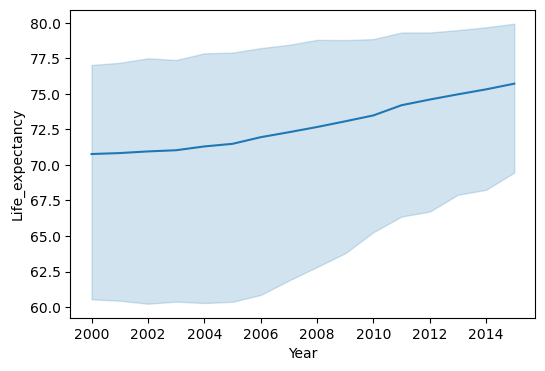

In [12]:
plt.figure(figsize=(6, 4))
sns.lineplot(data=df, x="Year", y="Life_expectancy")
plt.show()

Looks like life expectancy has generaly increased over time in the 6 countries.
But what of the individual countries?

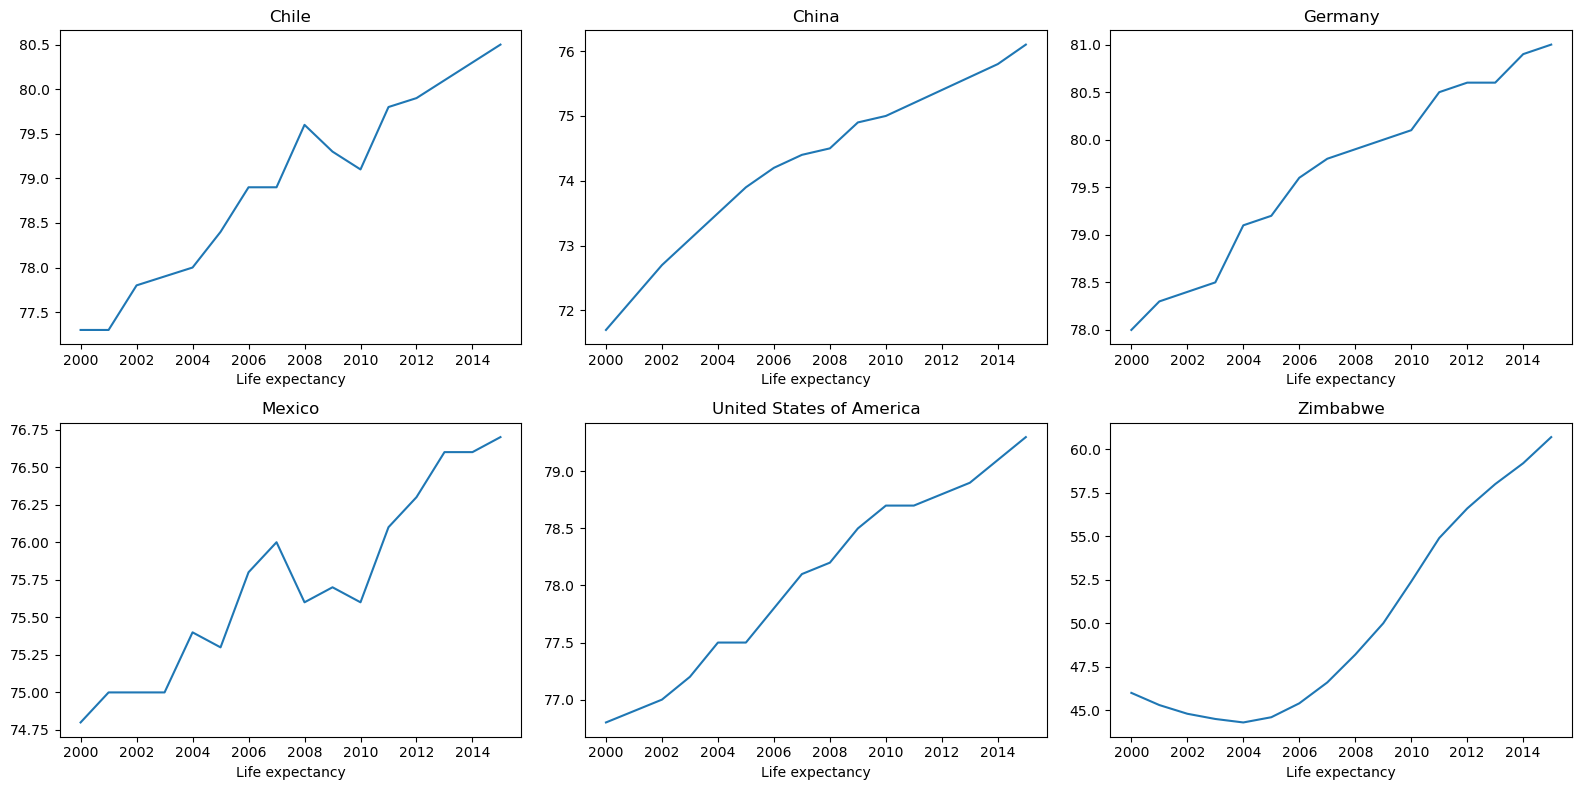

In [13]:
countries = df.Country.unique()
nrow = 2
ncol = 3
i = 0
fig, ax = plt.subplots(nrow, ncol, figsize=(16, 8))

for r in range(nrow):
    for c in range(ncol):
        data = df[df.Country == countries[i]]
        ax[r, c].plot(data.Year, data.Life_expectancy, label=countries[i])
        ax[r, c].set_title(f"{countries[i]}")
        ax[r, c].set_xlabel("Life expectancy")
        i+=1
plt.tight_layout()
plt.show()

Looks like life expectancy has increased over time in the six nations

Just how distributed is each country's Life expectancy?

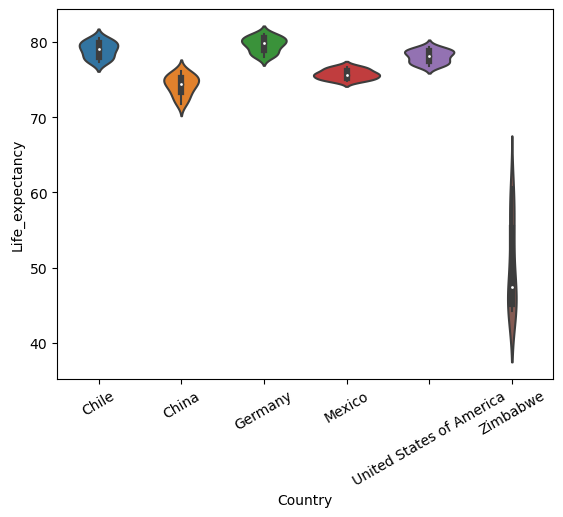

In [14]:
sns.violinplot(data=df, y='Life_expectancy', x="Country")
plt.xticks(rotation=30)
plt.show()

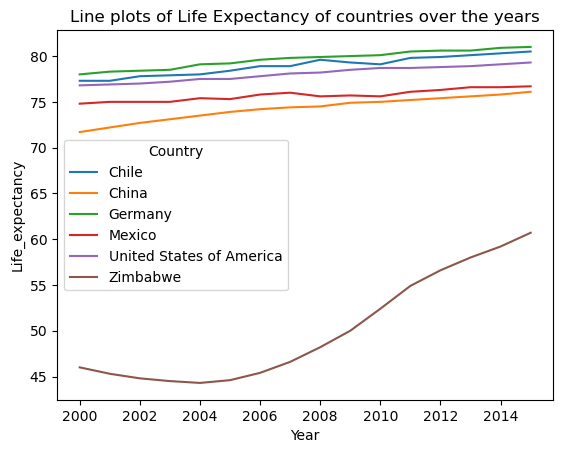

In [15]:
# plt.figure(figsize=(10, 8))
sns.lineplot(data=df, x="Year", y="Life_expectancy", hue="Country")
plt.title("Line plots of Life Expectancy of countries over the years")
plt.show()

When plotted together the most improved of them all seems to be "Zimbabwe"

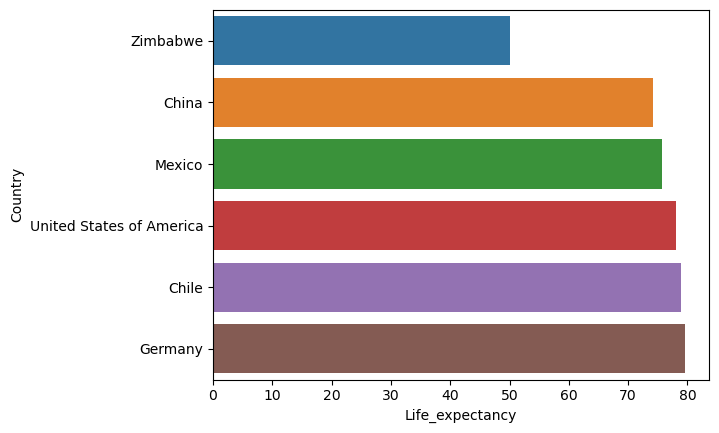

In [16]:
# Next we plot the average Life Expectancy if each country using bar charts
x = df.groupby("Country").Life_expectancy.mean().sort_values(ascending=True)
sns.barplot(y=x.index, x=x, orient="h")
plt.show()

- Just how distributed is GDP across all the countries?
- Has GDP increased in countries over time?
- What is the overall average GDP?

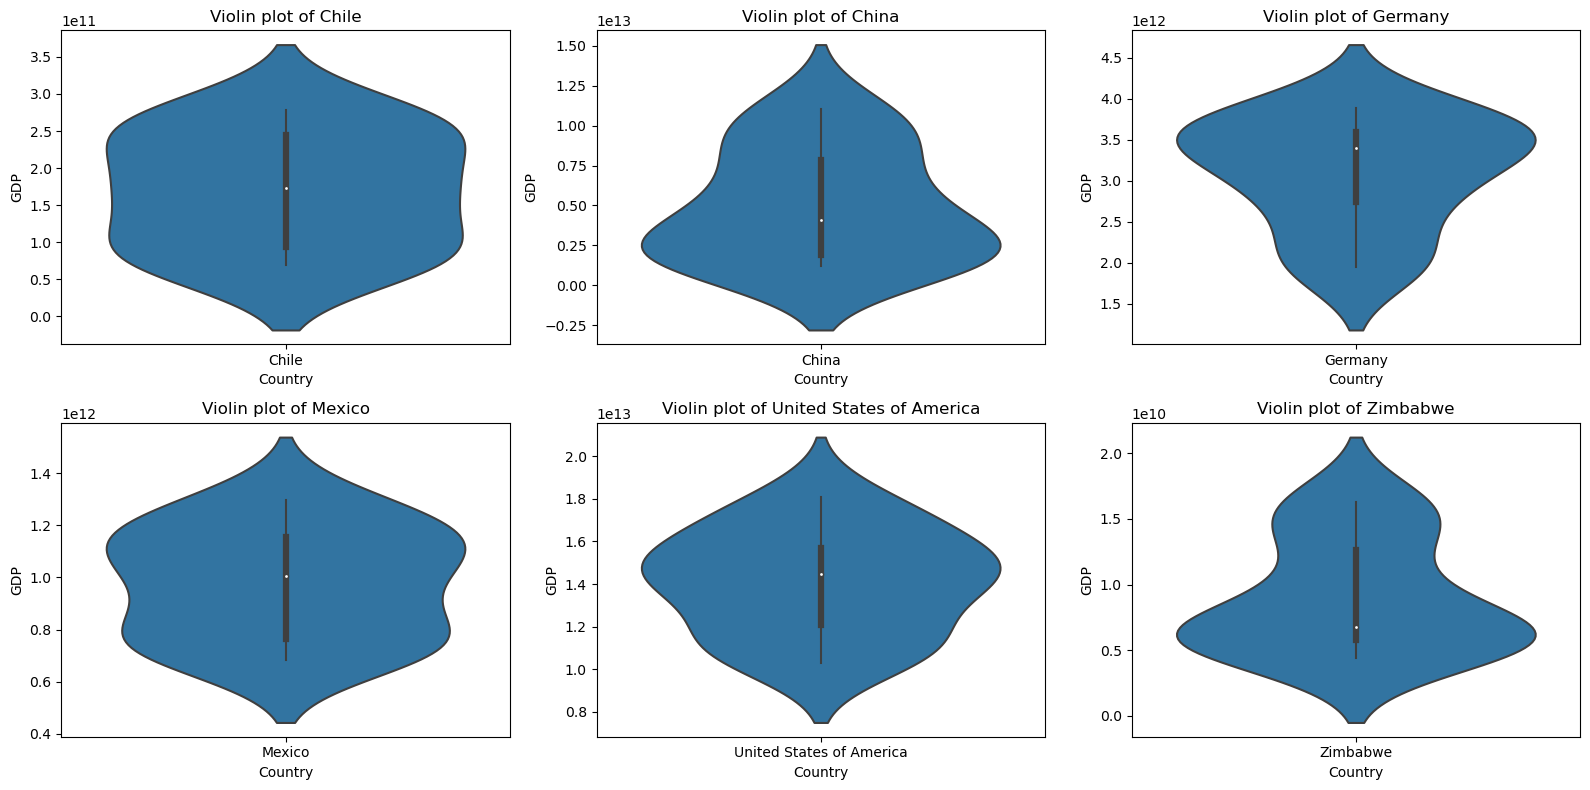

In [17]:
fig, ax = plt.subplots(nrow, ncol, figsize=(16, 8))
i=0
for row in range(nrow):
    for col in range(ncol):
        data = df[df.Country == countries[i]]
        sns.violinplot(x=data.Country, y=data.GDP, ax=ax[row, col])
        ax[row, col].set_title(f"Violin plot of {countries[i]}")
        i+=1

plt.tight_layout()
plt.show()

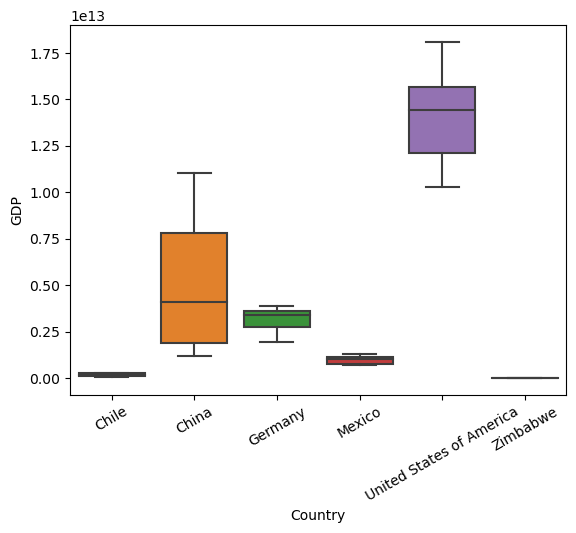

In [18]:
sns.boxplot(data=df, x="Country", y="GDP")
plt.show()

What is the mean GDP of each country

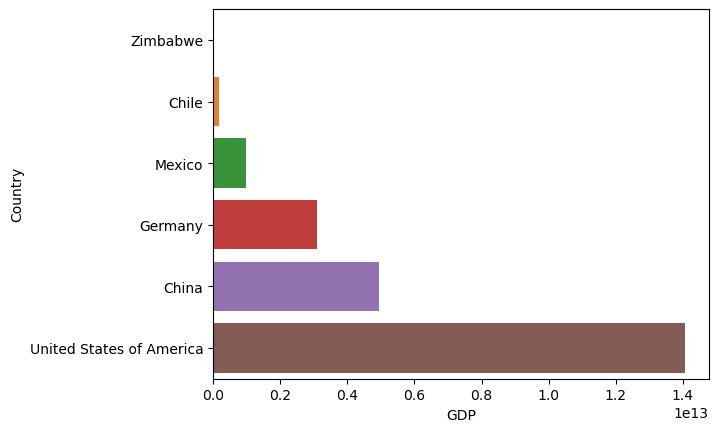

In [19]:
x = df.groupby("Country").GDP.mean().sort_values(ascending=True)

sns.barplot(y=x.index, x=x)
plt.show()

Has GDP increased over time in the six countries?

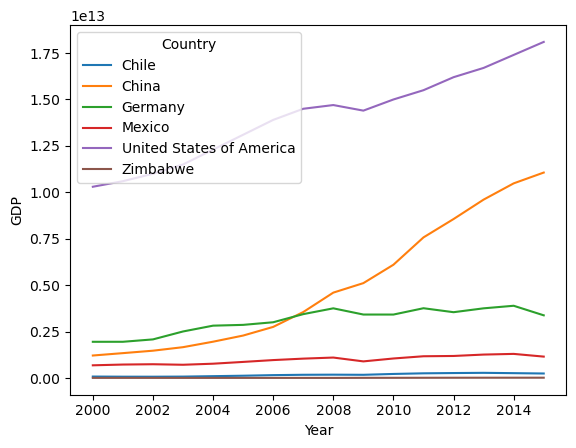

In [20]:
sns.lineplot(data=df, x="Year", y="GDP", hue='Country')
plt.show()

We can see here that China has made the most improvement and the U.S is the country with the highest GDP, meanwhile Countries like Chile, Zimbabwe and Mexico bearly made any significant improvement from this graph as compared to the U.S and China. Germany seems to be having some fluctuations but let's take a closer look and see.

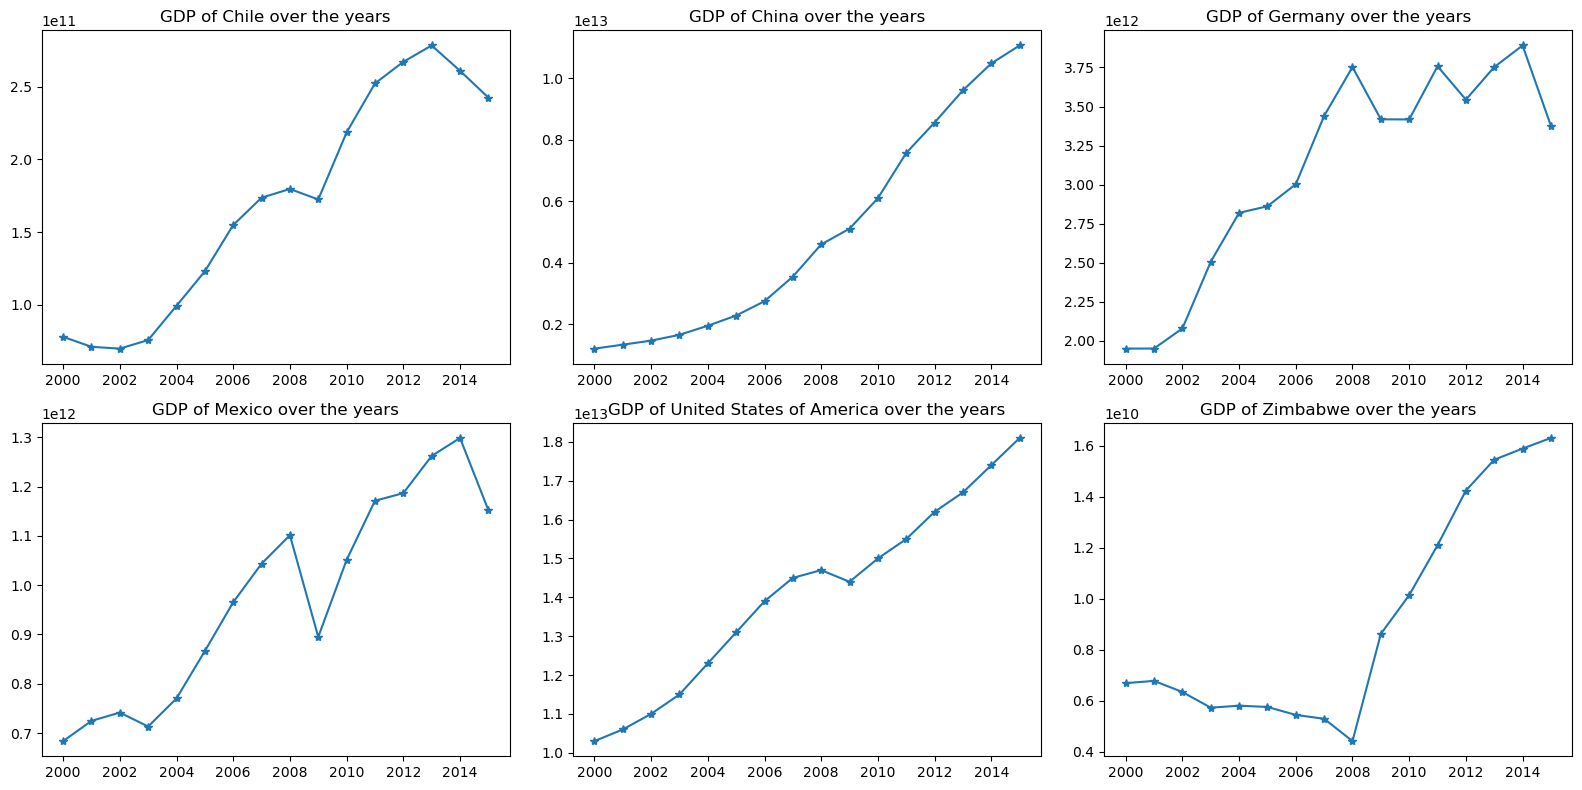

In [28]:
fig, ax = plt.subplots(nrow, ncol, figsize=(16, 8))
i = 0
for r in range(nrow):
    for c in range(ncol):
        d = df[df.Country == countries[i]]
        ax[r, c].plot(d.Year, d.GDP, marker="*")
        ax[r, c].set_title(f"GDP of {countries[i]} over the years")
        i+=1

plt.tight_layout()
plt.show()

Each country's GDP has increased over time but it seems that from the previous graph some of the increase look insignificant when compared with countries like China and U.S

Is there a correlation between GDP and life expectancy in each country

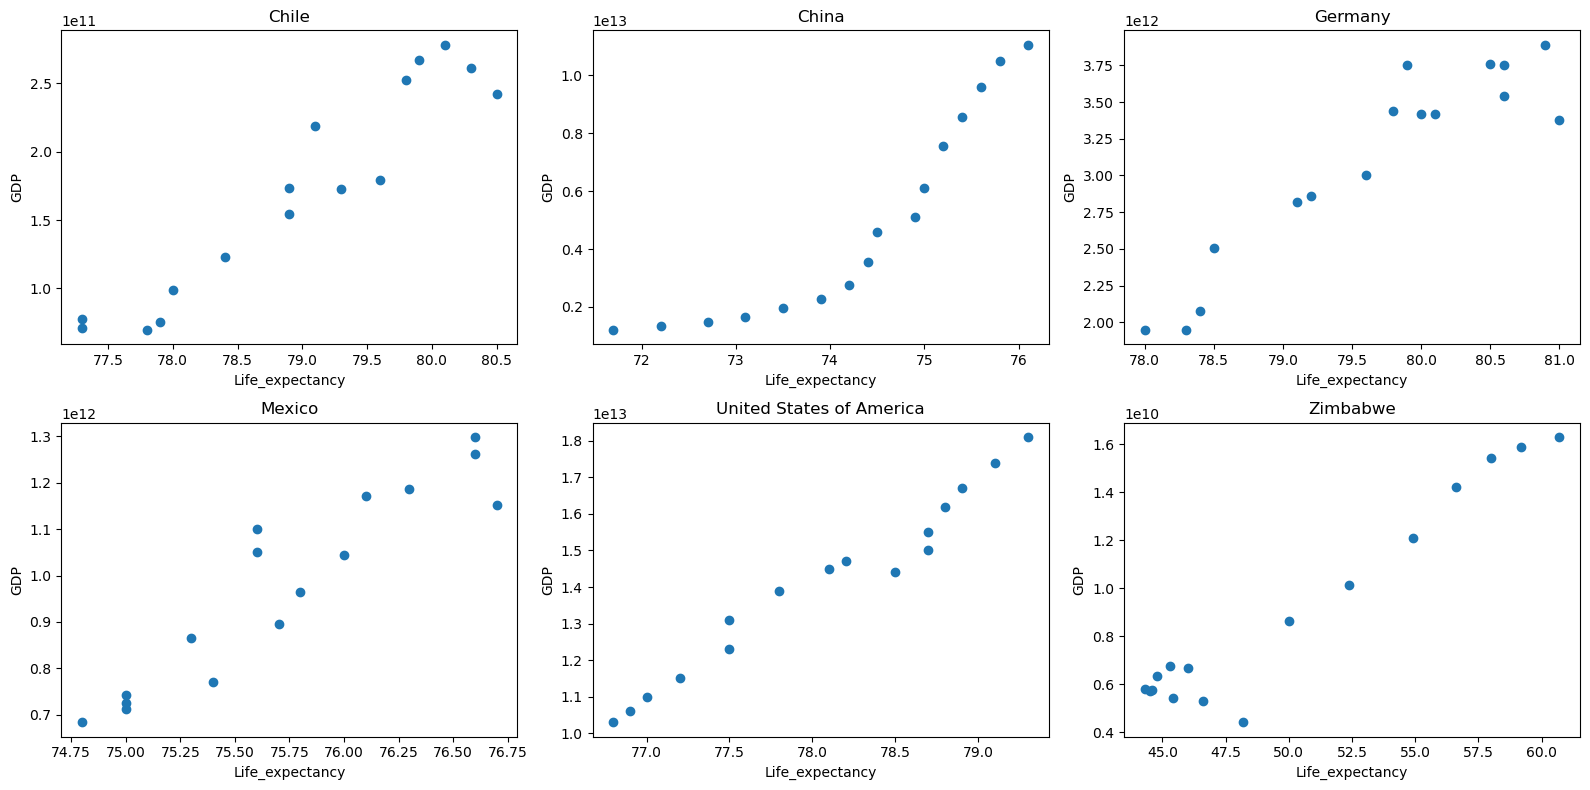

In [22]:
fig, ax = plt.subplots(nrow, ncol, figsize=(16, 8))

i = 0

for row in range(nrow):
    for col in range(ncol):
        data = df[df.Country == countries[i]]
        # sns.scatterplot(data=data, x="Life_expectancy", y='GDP', ax=ax)
        ax[row, col].scatter(data.Life_expectancy, data.GDP)
        ax[row, col].set_title(f"{countries[i]}")
        ax[row, col].set_xlabel("Life_expectancy")
        ax[row, col].set_ylabel(f"GDP")
        i+=1

plt.tight_layout()
plt.show()

They are positively correlated

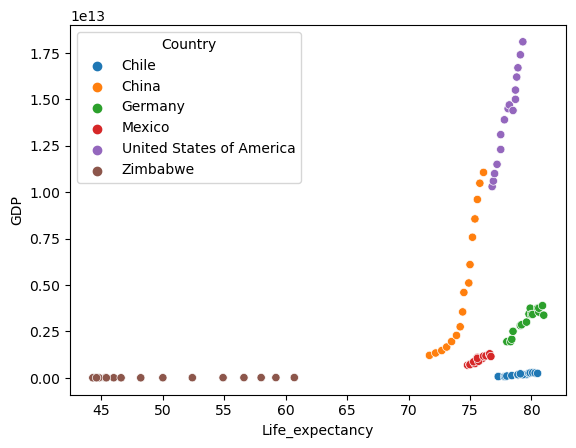

In [23]:
sns.scatterplot(data=df, x="Life_expectancy", y="GDP", hue="Country")
plt.show()

<h1>Conclusion</h1><br>
<p>We were able to make quite some visuals and analysis on the data which answered our question that we had at the beginning of this project: </p>

- Has life expectancy increased over time in the six nations?
    - Yes it has

- Has GDP increased over time in the six nations?
    - Yes it has increase significantly for China and U.S but not so much for the rest

- Is there a correlation between GDP and life 
    + There does seem to be a positive correlation between the two variables

- What is the average life expectancy in these nations?
    + The average life expactancy over all is about 80 but due to the outlier it dropped to about 70

- What is the distribution of life expectancy?
    - Life expectancy seems to be negatively skewed or left skewed mostly due to Zimbabwe's low but improving life expectancy

- What is the distribution of GDP?
    + The GDP of this data is on the other hand right skewed or positively skewed do to the high GDP of U.S

## Futher insights

Life expectancy has generally improved for the countries overall with Zimbabwe beign the most improved. When we take a closer look we see that Zimbabwe's life expectancy gradually dropped between the years 2000-2004 before spiking all the way up according to some sources this decline was due to a number of reasons such as [Economic decline](https://www.cgdev.org/blog/zimbabweans-have-shortest-life-expectancy), [Hiv/Aids pandemic](https://www.medicalnewstoday.com/articles/41339), [Health Care system breakdown](https://www.cgdev.org/blog/zimbabweans-have-shortest-life-expectancy), [Political Instability](https://www.cgdev.org/blog/zimbabweans-have-shortest-life-expectancy), and [Emmigration of professionals](https://www.cgdev.org/blog/zimbabweans-have-shortest-life-expectancy) which could also be the reason for it's low GDP, but it has overcome it with time. <br>
In Mexico the life expectancy dropped rapidly between 2007 to 2010 due to [Increase in homicides](https://link.springer.com/article/10.1007/s11113-023-09806-x), [chronic disease outbreak](https://borgenproject.org/life-expectancy-in-mexico/) and [socioeconomic disparities](https://link.springer.com/article/10.1007/s11113-023-09806-x)  according to various sources
<br><br>
As for their GDPs we already know that Zimbabwe experienced some economic crisis which contributed to low GDP and Life expectancy, we also see a sudden drop in Mexico's GDP at around the same time it's life expecatancy dropped, so can we conclude that the reasons above are responsible for this? Well according to the [FAS Project on government Secrecy](https://sgp.fas.org/crs/row/R41402.pdf) it was due to these reasons: Global Financial crisis, Dependancy on the U.S and Decline in oil prices. As for Germany we also notice a fluctuation in its GDP from around 2008 to 2014, according to [Global web icon Konrad-Adenauer-Stiftung](https://www.kas.de/c/document_library/get_file?uuid=53aa7bd4-8edc-81f4-24c4-a7b68005c49a&groupId=252038) Germany experienced a global financial crisis between 2008-2009 which it tried to recover from all the way to 2011 but then it got struck with Eurozone Debt Crisis up to 2012.

These insights could help us significantly improve our nations by learning what had happen in the past.

More resourses like this [Forbes article](https://www.forbes.com/sites/peterpham/2018/03/06/is-there-a-secret-growth-hormone-added-to-chinas-economy/#40869ba53f13) describes what happened to China and how its GDP rapidly grew over the past decade.